# Data Details 

In [1]:
# Import Useful Libraries
import numpy as np
import pandas as pd
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ignore warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Dataset
df=pd.read_csv(r"C:\Users\$ubhajit\Downloads\winequality-red.csv - winequality-red.csv.csv")

In [3]:
#check head 
df.head(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [4]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
#Check unique Quality 
Qua=df['quality'].unique()
Qua

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

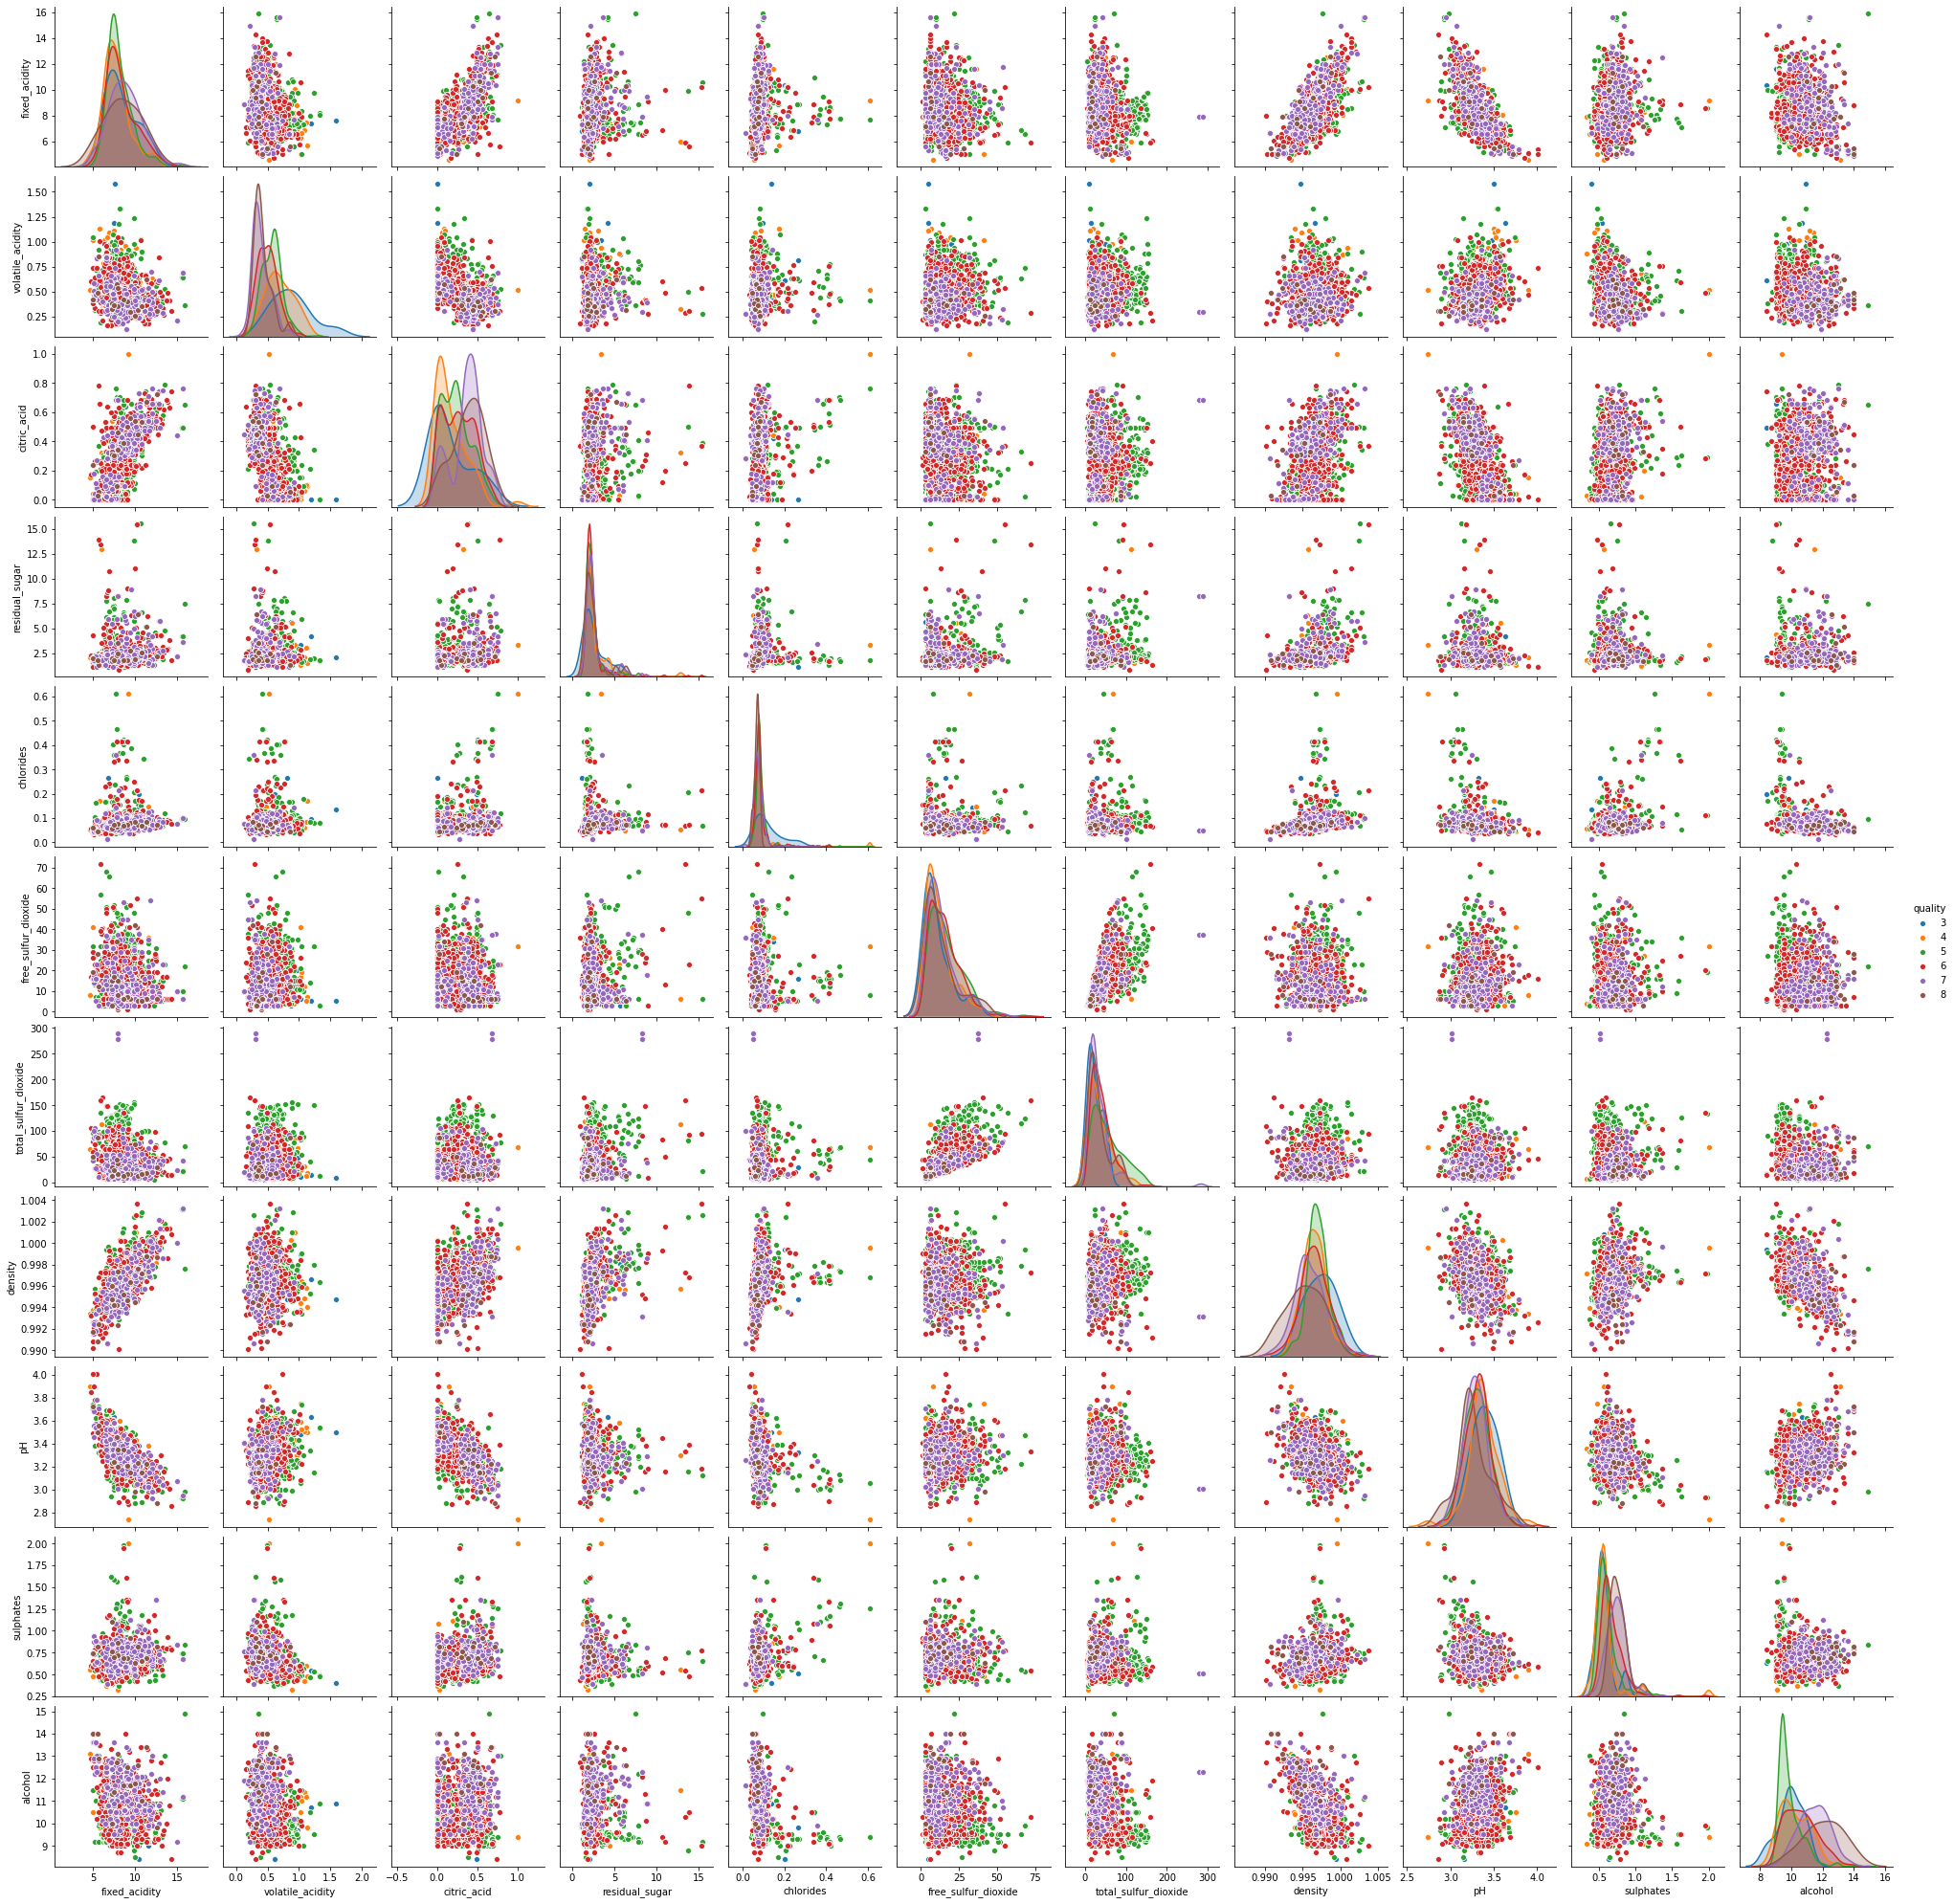

In [8]:
sns.pairplot(df,diag_kind='kde',hue='quality')

In [9]:
# making a copy of dataset
wine=df.copy() 
wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [10]:
# Drop Quality Feature From Dataset
wine.drop(['quality'], axis=1,inplace=True)

In [11]:
wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

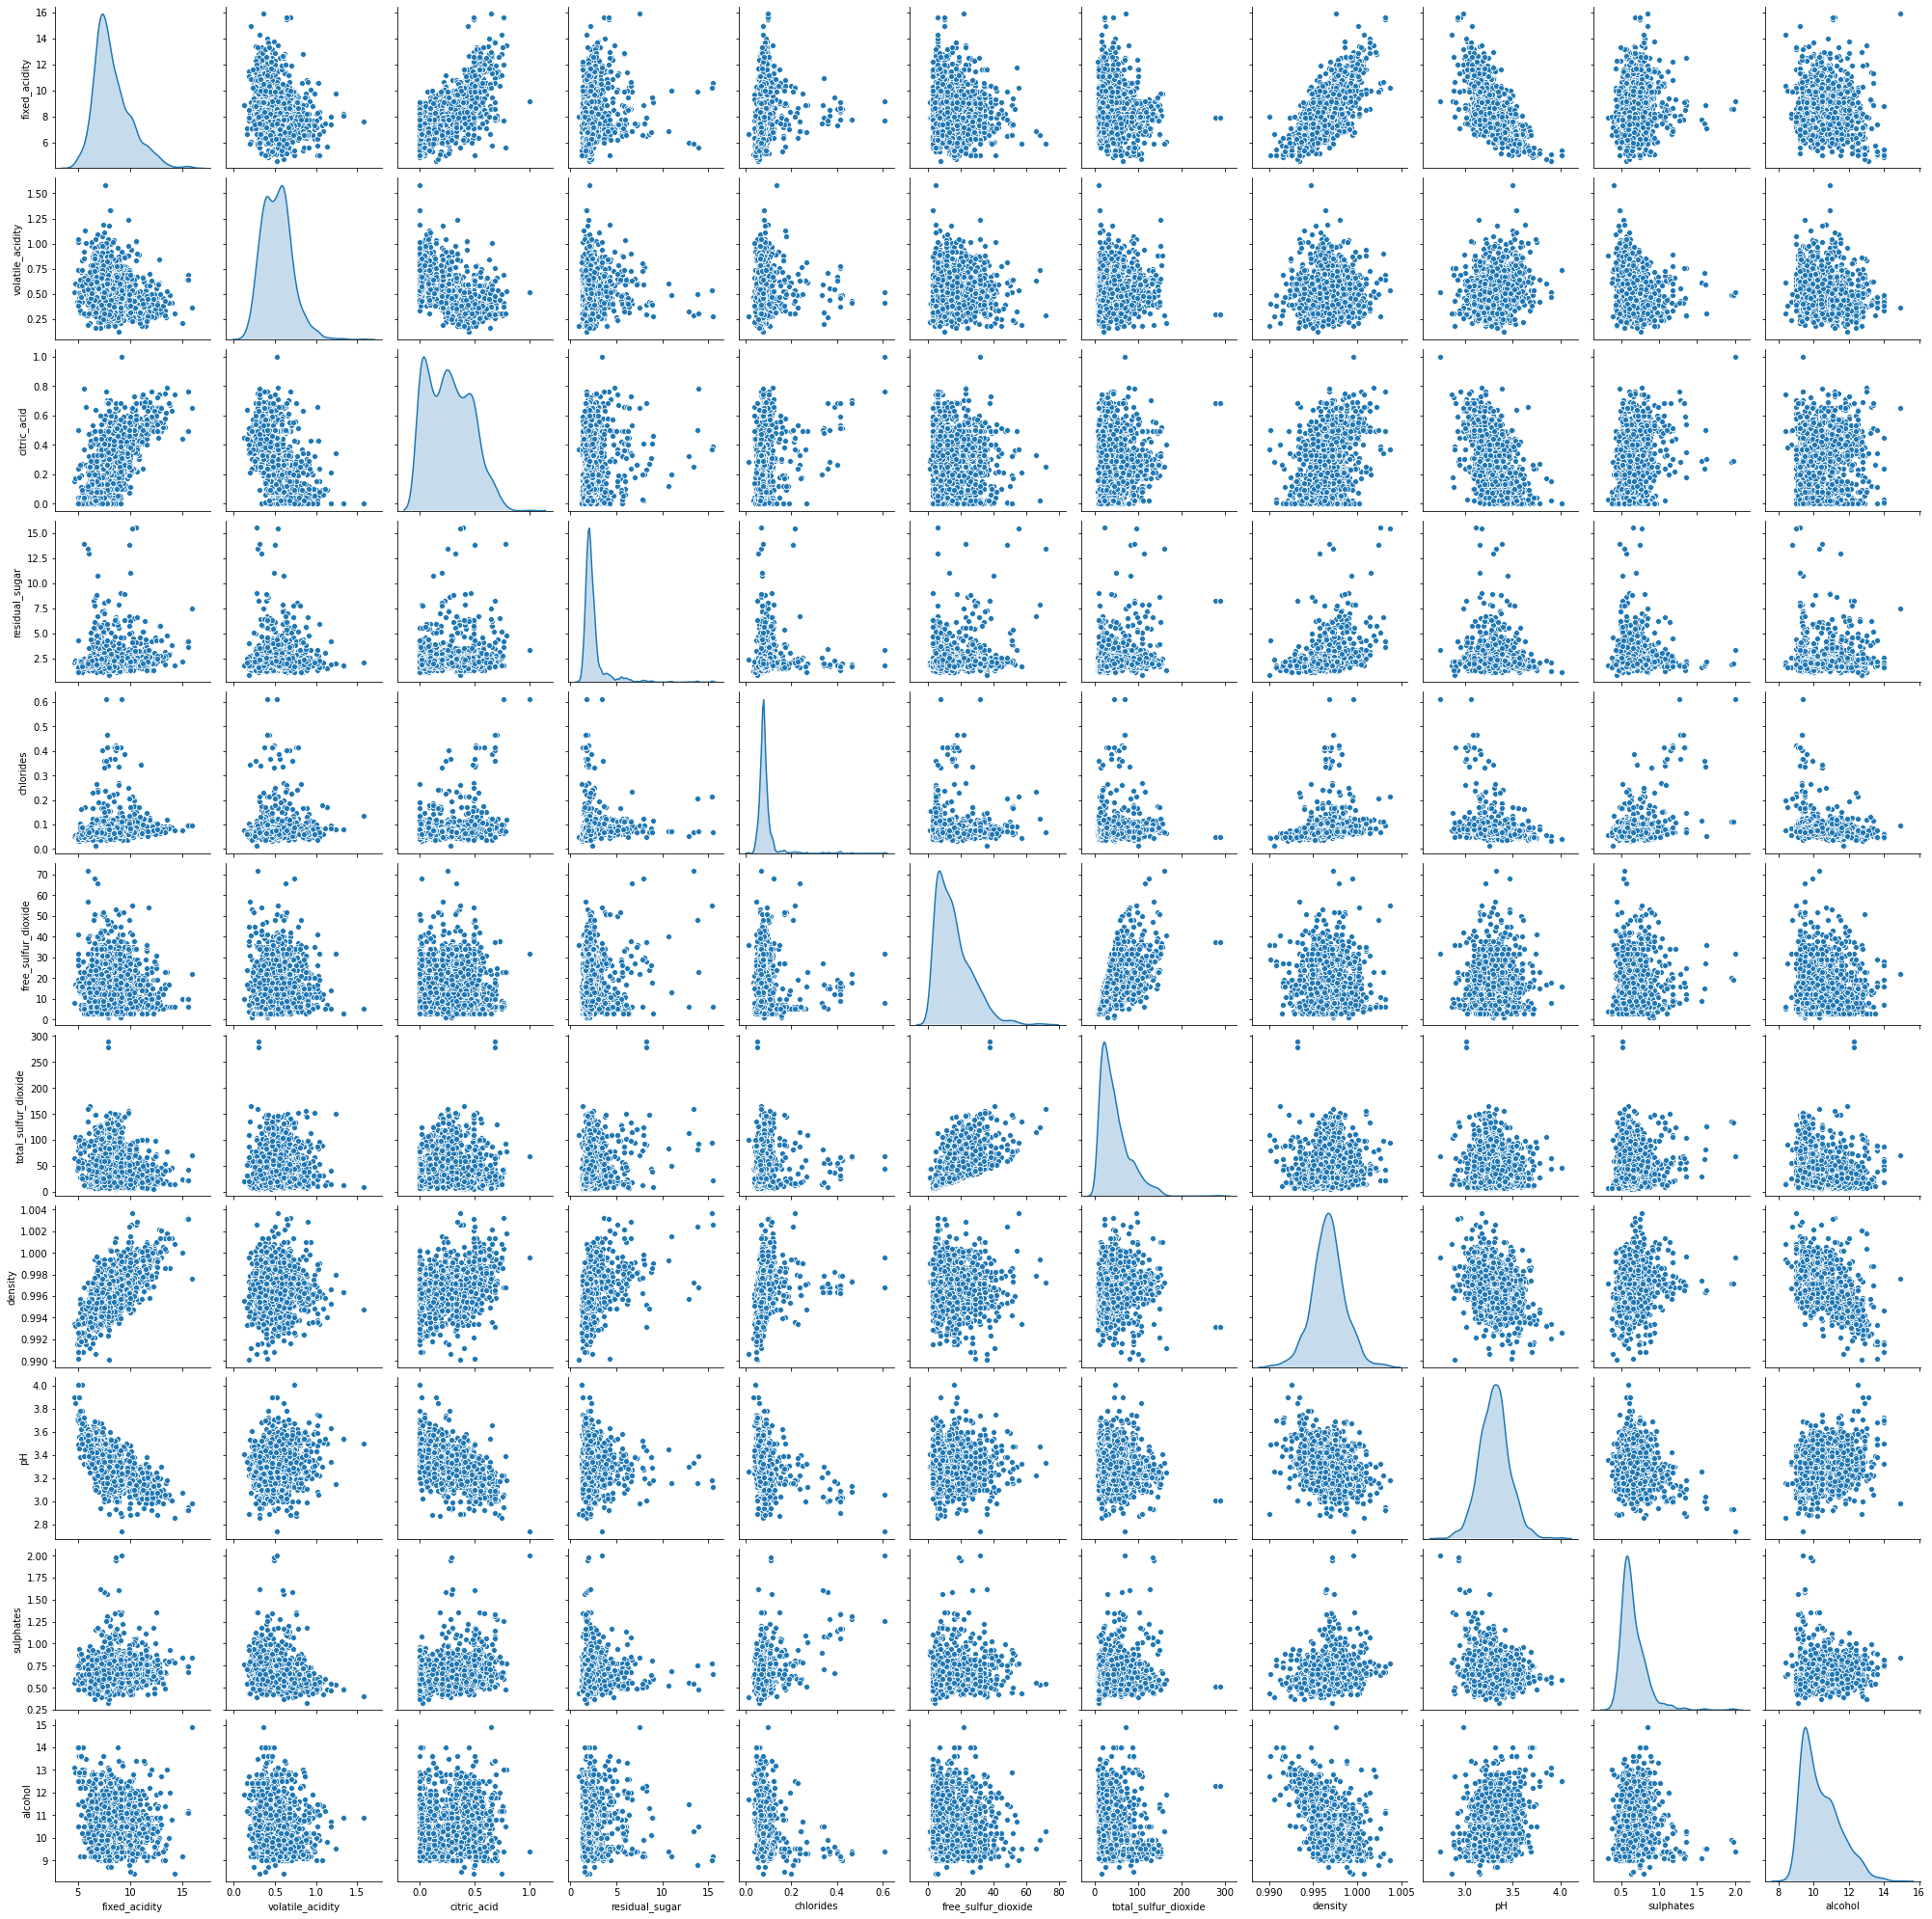

In [12]:
#check pairplot
#sns.pairplot(wine)
sns.pairplot(wine,diag_kind='kde')

In [13]:
# Scale the Dataset
from scipy.stats import zscore
df_scaled = wine.apply(zscore)
df_scaled.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  
3 -0.584777  
4 -0.960246

# Perform Kmean  Clustering

In [14]:
# Let us check optimal number of clusters-


# expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_range = range( 1, 15)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(wine)
    labels = clusters.labels_   # capture the cluster lables_
    centroids = clusters.cluster_centers_   # capture the centroids                         
    cluster_errors.append( clusters.inertia_ )   # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    1.914080e+06
1              2    6.919099e+05
2              3    3.953092e+05
3              4    2.831606e+05
4              5    2.212205e+05
5              6    1.773296e+05
6              7    1.498633e+05
7              8    1.328198e+05
8              9    1.165656e+05
9             10    1.016830e+05
10            11    9.347626e+04
11            12    8.632007e+04
12            13    8.038910e+04
13            14    7.503060e+04

The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

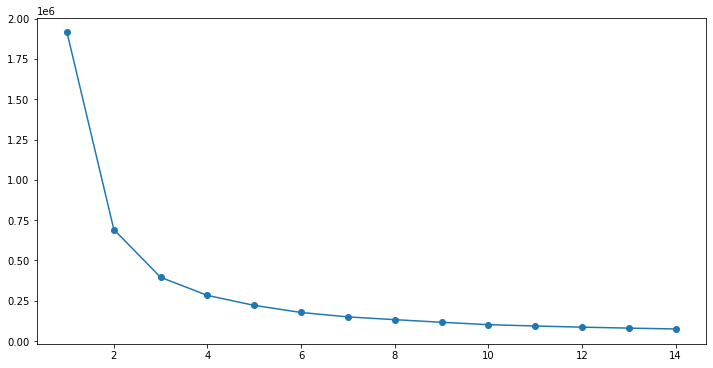

In [15]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

# Take Appropriate Cluster and Build a Kmean Cluster

In [16]:
# Number of clusters
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [17]:
# Fitting the input data
kmeans = kmeans.fit(df_scaled)

In [18]:

#Centroids
centroids = kmeans.cluster_centers_
centroids


array([[-0.09193154,  0.04040678,  0.10002523,  0.40375126, -0.00565364,
         1.06837447,  1.32458255,  0.28337592, -0.17924274, -0.1874165 ,
        -0.51052828],
       [-0.64954342,  0.45519175, -0.76049371, -0.23041486, -0.18882329,
        -0.22156028, -0.35074257, -0.45100943,  0.61490553, -0.28814064,
         0.0678794 ],
       [ 1.00398862, -0.68568878,  1.02077194,  0.03104975,  0.27616274,
        -0.47686049, -0.48168723,  0.43844069, -0.75207155,  0.55462042,
         0.28259117]])

In [19]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.091932          0.040407     0.100025        0.403751  -0.005654   
1      -0.649543          0.455192    -0.760494       -0.230415  -0.188823   
2       1.003989         -0.685689     1.020772        0.031050   0.276163   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             1.068374              1.324583  0.283376 -0.179243  -0.187416   
1            -0.221560             -0.350743 -0.451009  0.614906  -0.288141   
2            -0.476860             -0.481687  0.438441 -0.752072   0.554620   

    alcohol  
0 -0.510528  
1  0.067879  
2  0.282591

# hint
kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [20]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [21]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
wine_df_labeled= df_scaled.join(df_labels)

In [22]:

#wine_clusters = wine_data_attr.groupby(['clusters'])
wine_clusters = wine_df_labeled.groupby(['labels'])
df4= wine_clusters.get_group(0)
df5= wine_clusters.get_group(1)
df6= wine_clusters.get_group(2)
finaldf = pd.concat([df4,df5,df6])
finaldf.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1       -0.298547          1.967442    -1.391472        0.043416   0.223875   
9       -0.470907         -0.155419     0.457144        2.526589  -0.349975   
11      -0.470907         -0.155419     0.457144        2.526589  -0.349975   
14       0.333436          0.514959    -0.467164        0.894790   1.881666   
15       0.333436          0.514959    -0.415813        0.965737   1.754143   

    free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
1              0.872638              0.624363  0.028261 -0.719933   0.128950   
9              0.107592              1.688677  0.558274  0.251958   0.837107   
11             0.107592              1.688677  0.558274  0.251958   0.837107   
14             3.454669              2.996263  0.982285 -0.979104   1.309212   
15             3.359038              3.087490  0.982285 -0.914312   1.604277   

     alcohol labels  
1  -0.584777      0  
9   0.072294      0  
11  0.072294      0  
14 -1.147981      0  
15 -1.147981      0

In [23]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [24]:
I0=0
I1=0
I2=0
for i in np.arange(df4.shape[0]):
  I0=I0+np.sum((df4.iloc[i,:-1]-c0)**2)
for i in np.arange(df5.shape[0]):
  I1=I1+np.sum((df5.iloc[i,:-1]-c1)**2)
for i in np.arange(df6.shape[0]):  
  I2=I2+np.sum((df6.iloc[i,:-1]-c2)**2)

In [25]:
tot_I=I0+I1+I2
print(tot_I)

12629.925637963059


In [26]:
kmeans.inertia_

12629.925637963059

# Use silhouette_Coefficient to Find best No of Cluster 

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2139417458778928


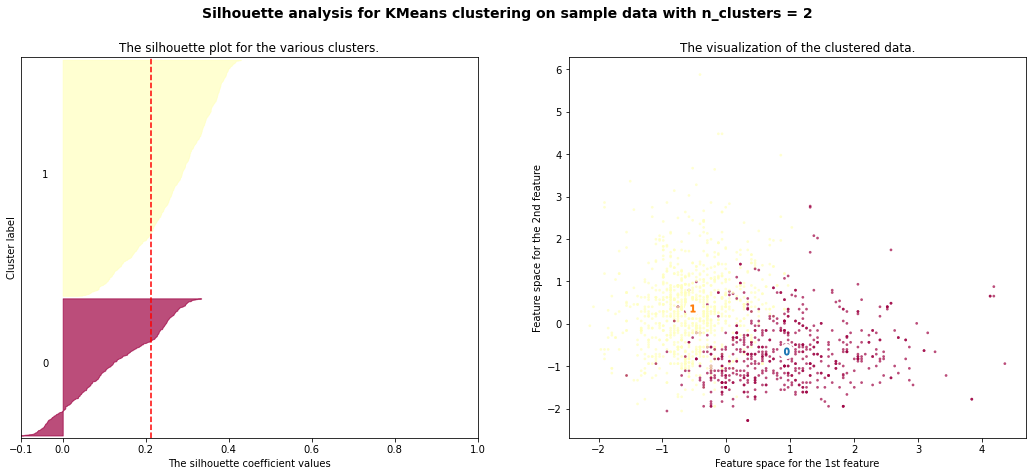

For n_clusters = 3 The average silhouette_score is : 0.18924495959290377


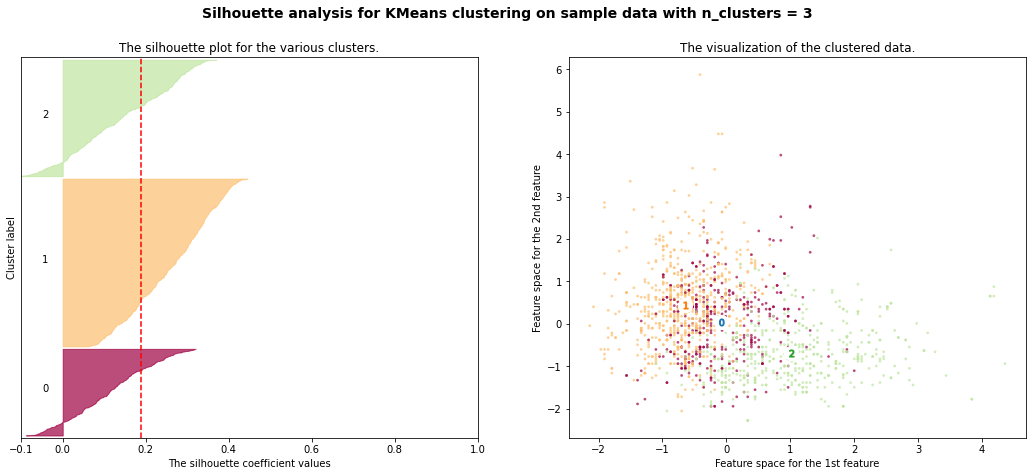

For n_clusters = 4 The average silhouette_score is : 0.20529050583921474


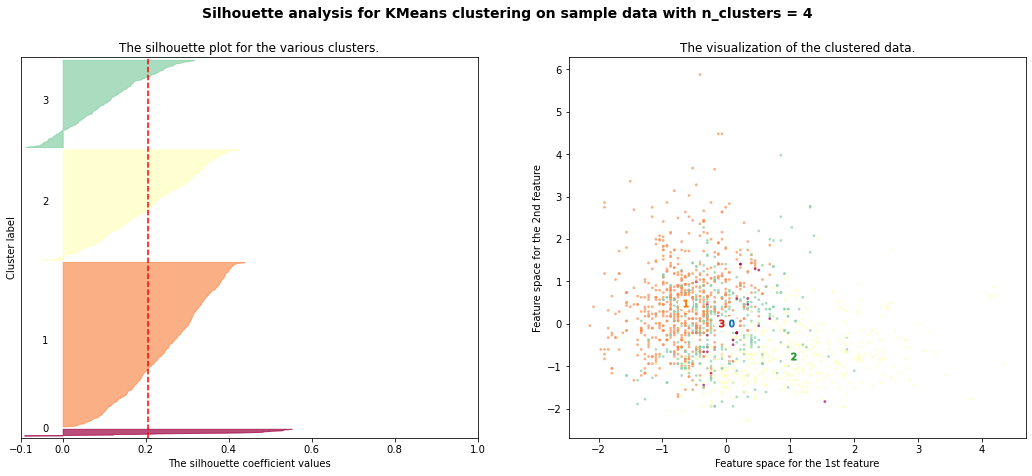

For n_clusters = 5 The average silhouette_score is : 0.19013920663576794


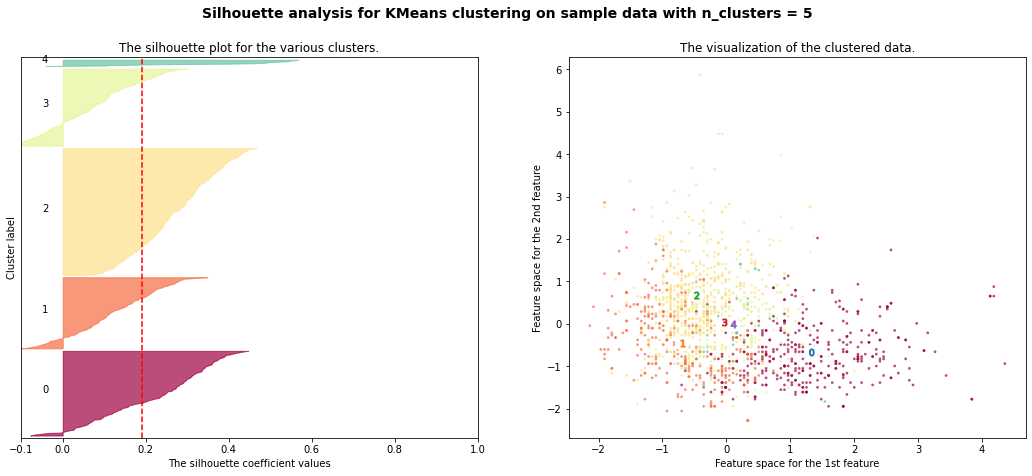

For n_clusters = 6 The average silhouette_score is : 0.19244552762535075


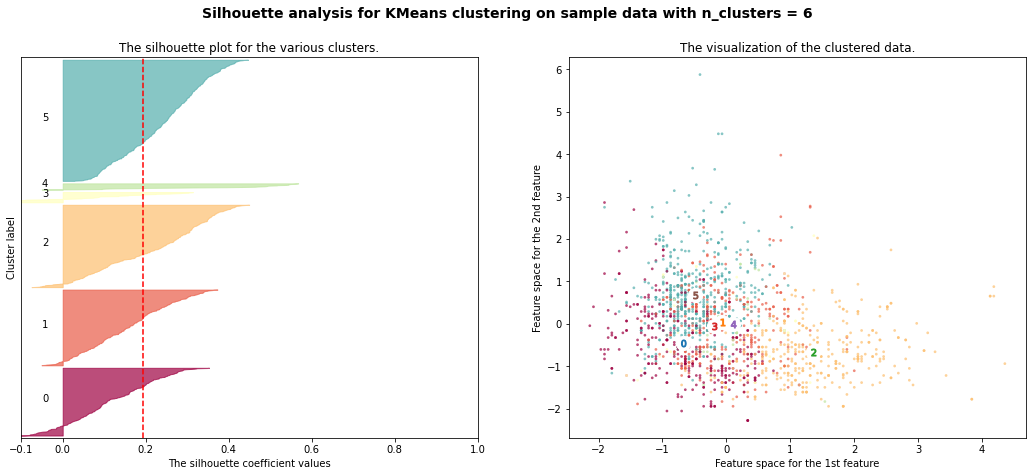

For n_clusters = 7 The average silhouette_score is : 0.190358973807942


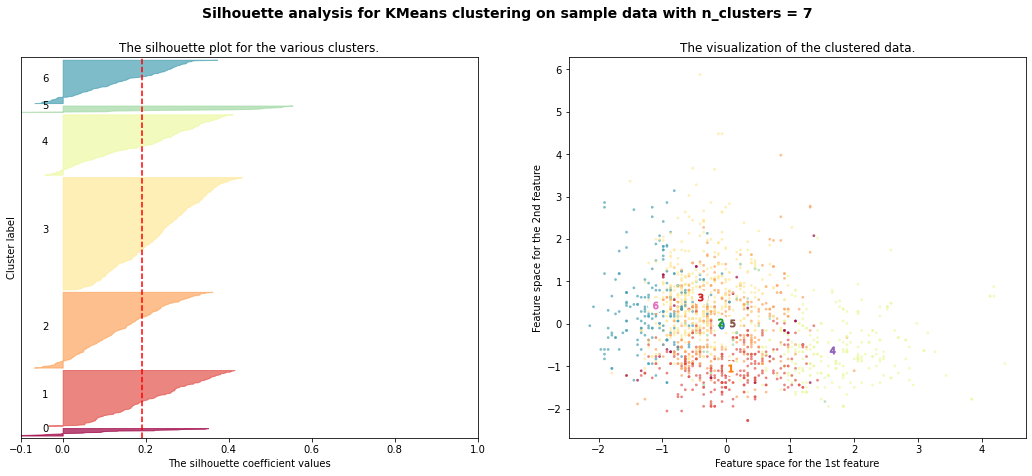

For n_clusters = 8 The average silhouette_score is : 0.1503194604593611


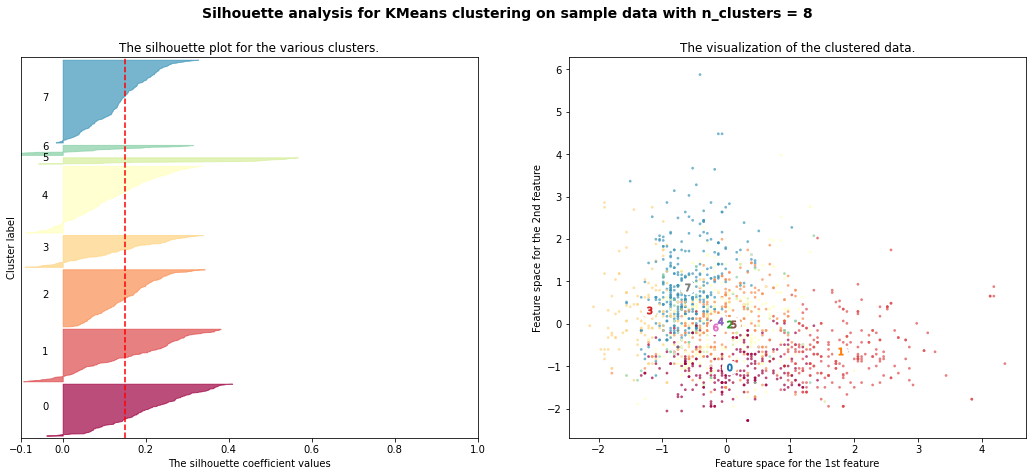

For n_clusters = 9 The average silhouette_score is : 0.15426870411159044


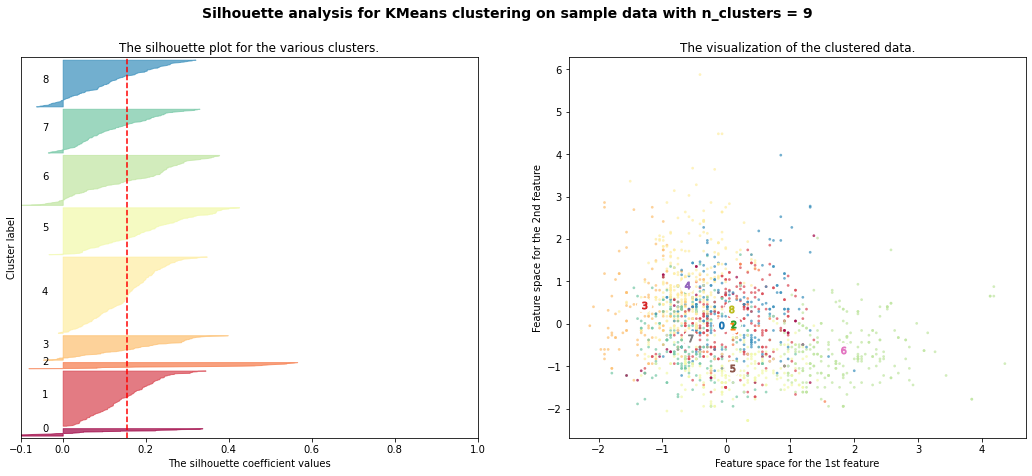

For n_clusters = 10 The average silhouette_score is : 0.15709033826792776


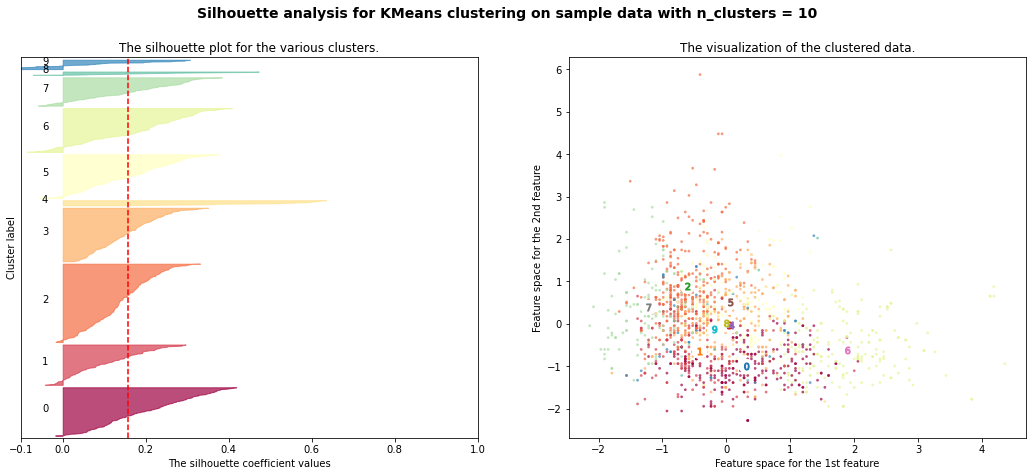

For n_clusters = 11 The average silhouette_score is : 0.1526417506218849


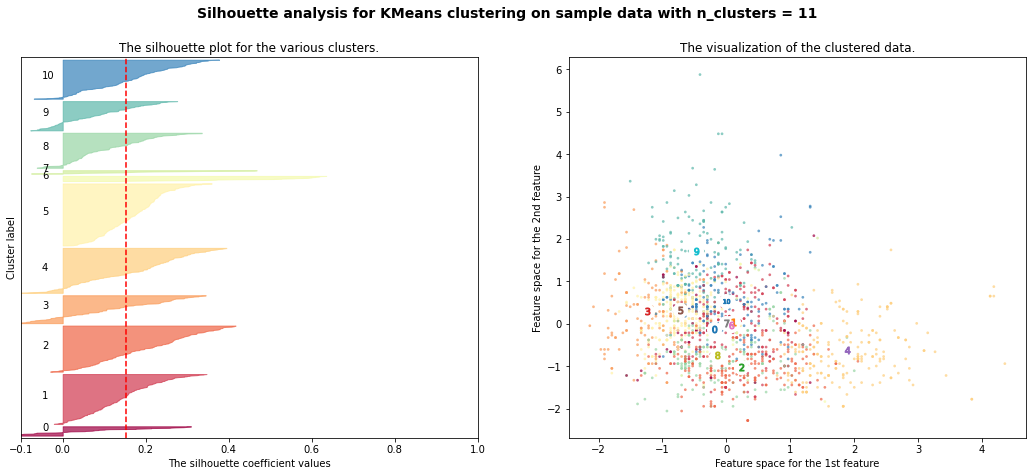

For n_clusters = 12 The average silhouette_score is : 0.1356511168412239


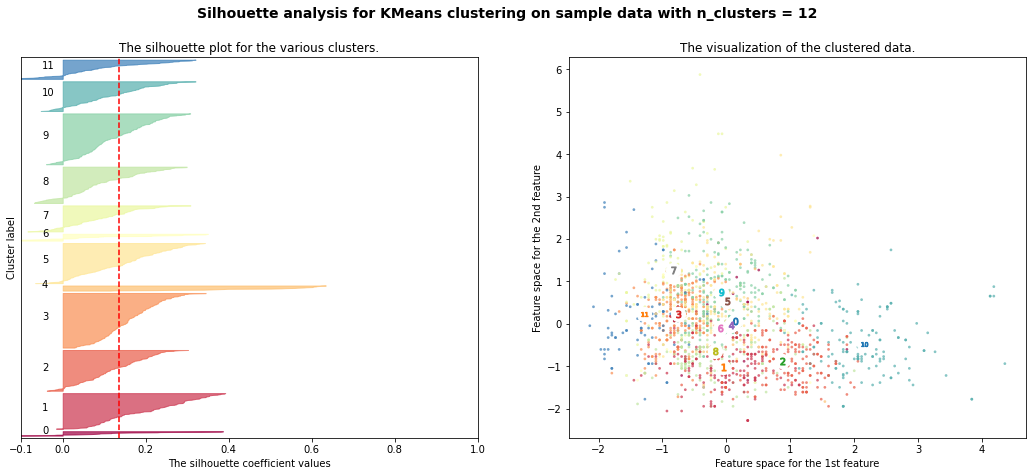

For n_clusters = 13 The average silhouette_score is : 0.145539416258602


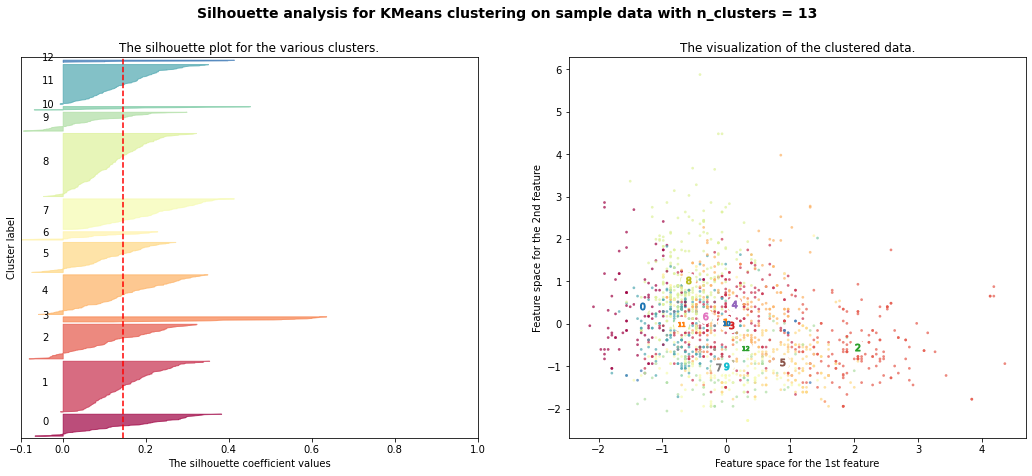

For n_clusters = 14 The average silhouette_score is : 0.14523633706031425


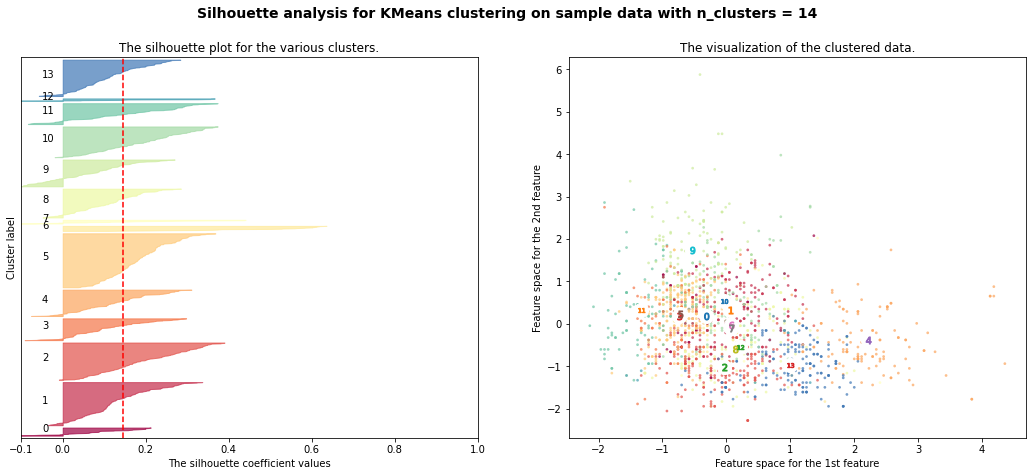

For n_clusters = 15 The average silhouette_score is : 0.1428245456644743


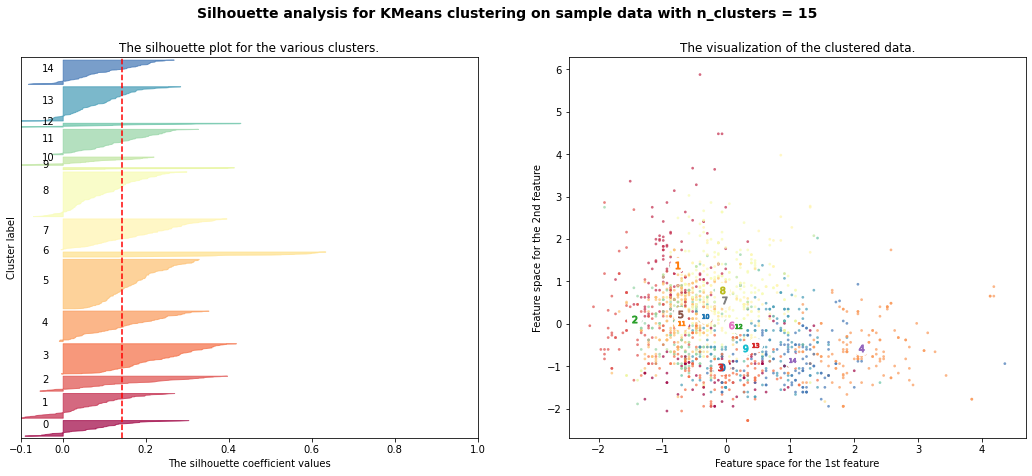

In [27]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

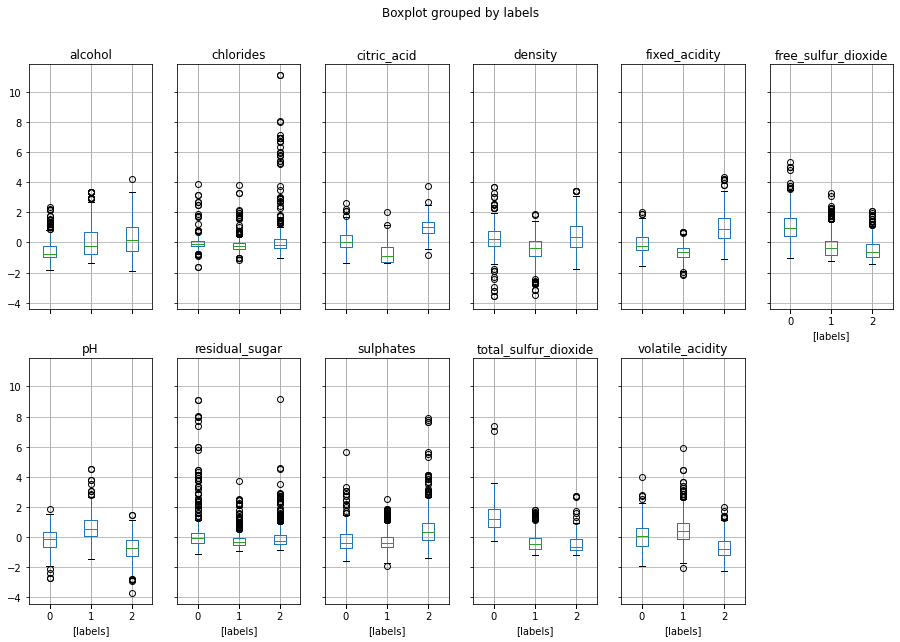

In [28]:
# Final Boxplot

finaldf.boxplot(by = 'labels',  layout=(2,6), figsize=(15, 10))
plt.show()

# Build a Dendogram 

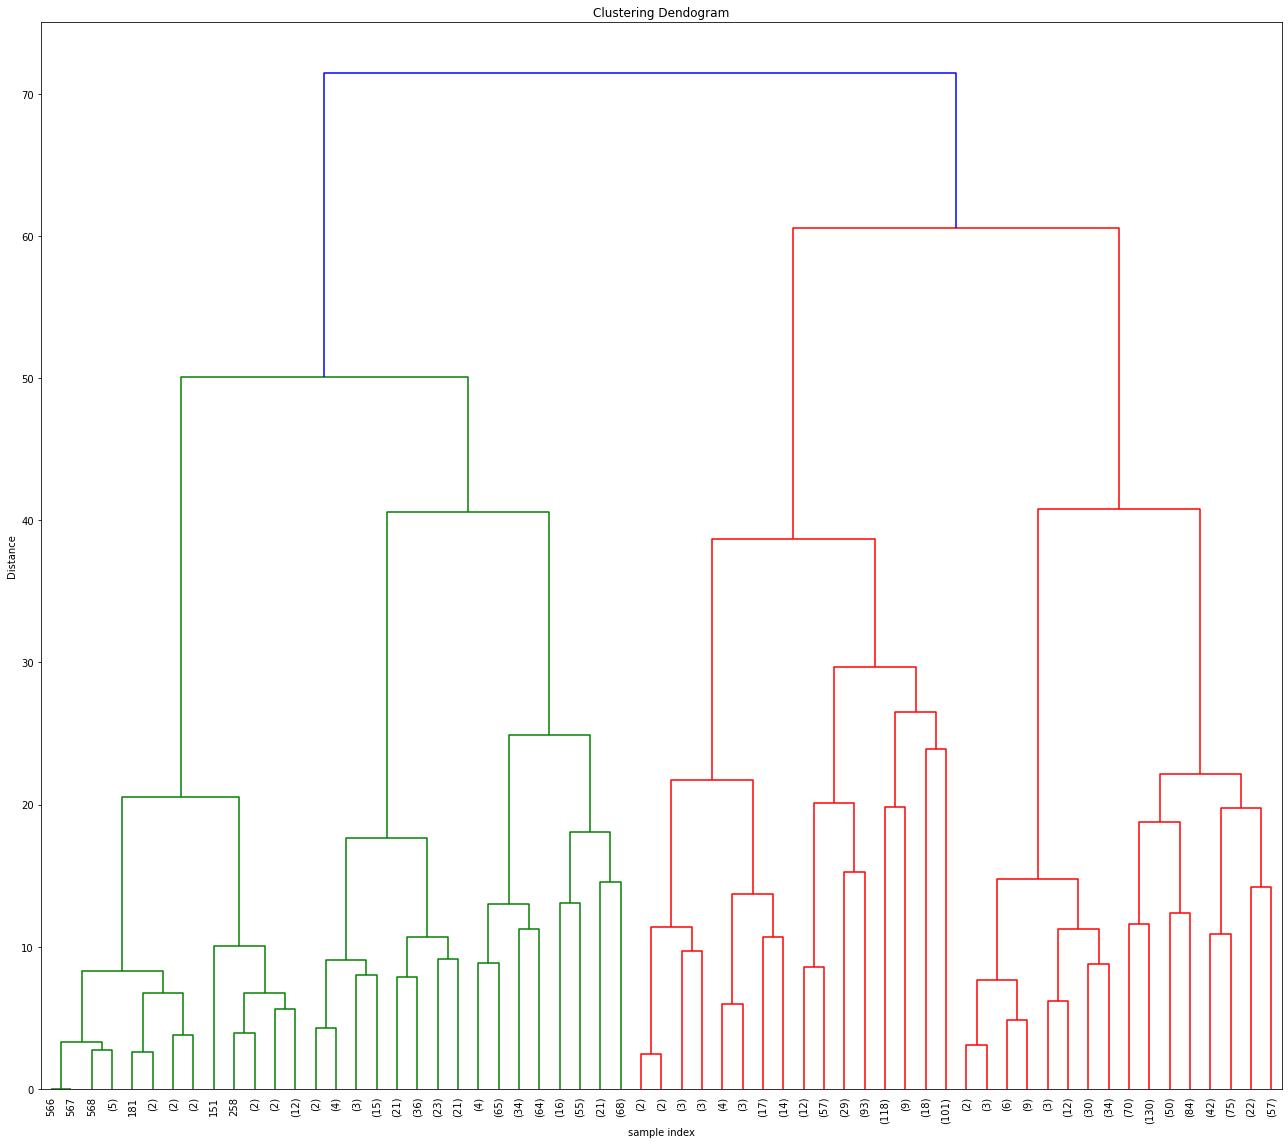

In [29]:

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()


# END